In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

* 대상선정값이 'O'인 것만 가져온다.

In [2]:
df2 = pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')
df = df2.loc[df2['대상 선정']=='O',:]

In [3]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [4]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   

     원인                검토결과  
12  미결선  O-기능(커넥터)-생산공장-미결선  
14   기타   O-기능(커넥터)-생산공장-기타

In [5]:
df.shape

(3012, 17)

* ro칼럼은 x에 '구분'칼럼은 y에 대입한다.

In [6]:
x = df['clm_prtl_sbc']
y = df['구분']

* 케라스 토크나이저를 이용하여 ro안의 단어를 토큰화 한다.(일단 keras토큰화가 얼마나 좋은지 확인차 불용어,단어변경은 나중에 하기로 함)
* x를 keras 토큰화를 하고 sequences를 이용하여 단어를 숫자 인덱스로 변환하여 저장한다.(빈도수를 알아보기 위해)

In [7]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)                   # X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(x) # 단어를 숫자인덱스로 변환하여 저장

Using TensorFlow backend.


In [8]:
print(sequences[:5])

[[1, 2, 3, 2, 115, 2223, 404, 26, 4984, 4, 1016, 42, 134, 421, 4985, 38, 4, 11, 115, 40, 5, 51, 4986, 3029, 4987, 4988, 2224, 3029, 1128, 1487, 462, 25, 320, 4989, 1287, 588, 103, 463, 69, 404, 4, 589, 25, 51, 10, 590, 170, 196, 69, 1761, 918, 25, 51, 919, 774, 238, 4990, 16, 115, 1761, 918, 4991, 464, 2224, 25, 51, 10, 36], [1, 3, 2, 9, 88, 146, 38, 4, 11, 1762, 569, 1763, 64, 3030, 4992, 8, 1764, 16, 229, 4, 623, 15, 20, 51, 10, 4993, 1129, 4994, 920], [1, 40, 4995, 4996, 3031, 2225, 710, 62, 4997, 4998, 4999, 5000, 5001, 2225, 5002, 116, 570, 5003, 433, 5004, 5005, 364], [1, 5006, 8, 171, 66, 490, 711], [1, 921, 36, 3032, 921, 66, 176, 465, 364]]


* 단어를 포함하여 인덱스로 시퀀스된 것을 확인한다. 

In [9]:
word_index = tokenizer.word_index
print(word_index)

{'c': 1, '현상': 2, '1': 3, '및': 4, '점검': 5, '교환': 6, '소음': 7, '경고등': 8, '주행중': 9, '정상': 10, '원인': 11, '조치': 12, '후': 13, '발생': 14, '교환후': 15, '조치내용': 16, '불량으로': 17, '리어': 18, '3': 19, '시운전': 20, '운전석': 21, '도어': 22, '점검시': 23, '2': 24, '확인': 25, '작동시': 26, '센서': 27, '스위치': 28, '윈도우': 29, '이음': 30, '프론트': 31, '배선': 32, '조수석': 33, '점등': 34, '출고': 35, '작동': 36, '내부': 37, '점검내용': 38, '커넥터': 39, '차량': 40, '점검결과': 41, '발생으로': 42, '브레이크': 43, '주행시': 44, '출고함': 45, '점등으로': 46, '입고': 47, '입고2': 48, '고장코드': 49, '이상': 50, '결과': 51, '우측': 52, '인한': 53, '불량': 54, '좌측': 55, '시운전시': 56, '간헐적': 57, '엔진': 58, '모듈': 59, '시트': 60, '상기': 61, '확인시': 62, '어셈블리': 63, '발생됨': 64, '소음발생': 65, '컨넥터': 66, '이상으로': 67, '에어백': 68, '탈거후': 69, '테일게이트': 70, '4': 71, '소음으로': 72, '관련': 73, '양쪽': 74, '소음이': 75, '간헐적으로': 76, '회로': 77, '발생되어': 78, '후진시': 79, '조치함': 80, '확인함': 81, '없음': 82, '교환함': 83, '하강시': 84, '사이드': 85, '좌': 86, '요철': 87, '엔진경고등': 88, '확인결과': 89, '차량은': 90, '동일': 91, 'pm센서': 92, '수정': 93, '확인됨': 94, '글라스'

* 단어 인덱스를 모두 세보면 17,372단어로 토큰화가 된 것을 알 수 있다.

In [10]:
print((len(word_index)))

17372


* 대상선정이 'O'인 행의 총수가 3012개 이기 때문에 이것을 train과 test로 나눠주기 위해 알기 쉽게 숫자로 나타낸다.

In [11]:
n_of_train = int(3012 * 0.8)
n_of_test = int(3012 - n_of_train)
print(n_of_train)
print(n_of_test)

2409
603


* 토큰화된 sequences라는 단어들을 x변수에 다시 입력한다.
* x안에 중복된 단어 제외하고 단어의 종류가 최대 몇 개가 있는지 프린트한다.
* x안에 각 단어들이 몇 개씩 존재하는지 각각 히스토그램 그래프로 나타낸다.

157


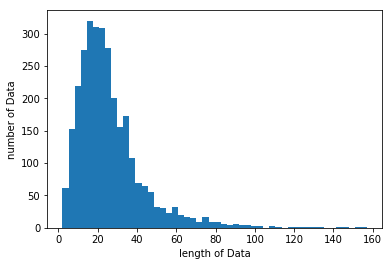

In [12]:
x = sequences
print(max(len(l) for l in x))
plt.hist([len(s) for s in x], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

* keras의 RNN,LSTM 등의 패키지를 불러온다
* keras의 Sequential 패키지를 불러온다.
* keras의 pas_sequences 패키지를 불러온다.

* 최대단어수에 1을 더해서 vocab_size변수에 입력한다.
* 중복된 단어를 제외한 최대 단어수 157을 max_len 변수에 입력한다.
* 토큰화된 x 안에 단어들을 3012 X 157 행렬로 배열해 줘서 data라는 변수에 입력한다.

※ pad_sequence() : 
   - 각 훈련 데이터는 길이가 서로 다를 수 있다. 또는 각 문서 또는 문장은 단어의 수가 제각각이다.
   - 모델의 입력으로 사용하려면 모든 훈련 데이터의 길이를 동일하게 맞추어야할 때가 있다.
   - 이를 자연어 처리에서는 패딩(padding)작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 데이터들의 길이를 맞춰준다. 

In [13]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

vocab_size = len(word_index)+1   # 단어의 수
max_len = 157                    # 전체 데이터의 길이는 157로 맞춥니다.
data = pad_sequences(x, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (3012, 157)


* data를 내용을 보면 array로 되어 있다

In [18]:
data.shape

(3012, 157)

* 이제 트레이닝과 테스트 단어로 나눠준다.(아까 숫자로 구분해 분리해 놓은 것을 사용한다.)

In [15]:
x_test = data[n_of_train:]  # x데이터 중에서 뒤의 2409개의 데이터만 저장
y_test = y[n_of_train:]     # y데이터 중에서 뒤의 603개의 데이터만 저장
x_train = data[:n_of_train] # x데이터 중에서 앞의 2409개의 데이터만 저장
y_train = y[:n_of_train]    # y데이터 중에서 앞의 603개의 데이터만 저장

In [17]:
y_test

6486    실내부품이음
6491      하체이음
6495    실내부품이음
6496    실내부품이음
6499    실내부품이음
6500    실내부품이음
6501    실내부품이음
6502      하체이음
6503      하체이음
6504      하체이음
6510      하체이음
6512    실내부품이음
6514    실내부품이음
6515    실내부품이음
6516      하체이음
6517    실내부품이음
6521    실내부품이음
6522    실내부품이음
6524    실내부품이음
6525    실내부품이음
6526    실내부품이음
6529    실내부품이음
6530    실내부품이음
6532      하체이음
6534      하체이음
6537    실내부품이음
6540    실내부품이음
6541    실내부품이음
6542    실내부품이음
6544      하체이음
         ...  
8050      하체이음
8051      하체이음
8052    실내부품이음
8053      하체이음
8054      하체이음
8056      하체이음
8062      하체이음
8065      하체이음
8067      하체이음
8068      하체이음
8069      하체이음
8076    실내부품이음
8158    실내부품이음
8175      하체이음
8183      하체이음
8185      하체이음
8186      하체이음
8187      하체이음
8194      하체이음
8197      하체이음
8214      하체이음
8260      하체이음
8262      하체이음
8288      하체이음
8291    실내부품이음
8301    실내부품이음
8324      하체이음
8367    실내부품이음
8382    실내부품이음
8458    실내부품이음
Name: 구분, Length: 603, dtype: object

In [16]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(603, 157)
(603,)
(2409, 157)
(2409,)


In [17]:
print(type(x_test))
print(type(y_test))
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [18]:
model = Sequential()
model.add(Embedding(vocab_size,157))
model.add(SimpleRNN(32)) 
# model.add(Dense(7, input_dim=3, init='uniform', activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
model

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model

In [20]:
history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test,y_test),verbose=1)

ValueError: Error when checking target: expected dense_1 to have shape (5,) but got array with shape (1,)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 모델화 (RNN 이용) 이론설명

1. **워드 임베딩**
  텍스트를 기계가 숫자로서 텍스트를 이해할 수 있도록 텍스트로 표현되었던 단어들을 밀집 벡터(Dense Vector)로 만드는 것을 말한다.

2. **밀집 벡터**

  - 원-핫 벡터는 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터이다. 
  - 또한 벡터의 차원이 대체적으로 크다는 성질을 가졌다.
  - 원-핫 벡터의 예는 다음과 같다.

   * **원핫벡터**
      - 차원이 굉장히 크면서 대부분의 값이 0 이다.
      
     Ex) [0 1 0 0 0 0 ... 중략 ... 0 0 0 0 0 0 0]  
   
   대부분의 값이 0인 이러한 벡터를 희소 벡터(Sparse vector)라고 한다. 즉, 원-핫 벡터는 희소 벡터의 하나의 예이다.
   원-핫 벡터는 단어의 수만큼 벡터의 차원을 가져야 한다는 단점이 있다. 
   반면, 희소 벡터와 표기상으로도 의미상으로도 반대인 벡터가 있다. 
   바로 대부분의 값이 실수이고, 대체적으로 저차원 벡터인 밀집 벡터(Dense vector)이다.
   
   * **밀집벡터**
       - 차원이 대체적으로 작고 실수값을 가짐
   
      Ex) [0.1 -1.2 0.8 0.2 1.8]


3. 간단하게 표로 정리해보면 아래와 같다.

|-       |one-hot vector       |Embedding Vector |
|--------|---------------------|----------|
|차원     |고차원(단어 집합의 크기)|저차원     |
|표현방법 |희소벡터일종            |밀집벡터일종|
|값의타입 |1과0                  |실수      |




* Embedding() : 
  Embedding()은 단어를 밀집 벡터로 만드는 역할을 한다. 인공 신경망의 구조적 관점에서는 임베딩 층(Embedding layer)을
  만드는 역할을 한다고 말할 수 있다. 이때, Embedding()의 입력으로 각 단어는 이미 정수 인코딩이 된 상태여야 한다.
  Embedding()은 정수 인코딩이 된 상태의 입력을 받아서 임베딩을 수행한다.

  아래의 코드는 실제 사용되는 코드가 아니라 의사 코드(pseudo-code)로, 이해를 돕기 위해서 작성되었다.
  실제로는 Embedding()을 사용하기 위해서는 Sequential()를 먼저 사용해야 한다.
  Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받는다.
  이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스이다.
  Embedding()은 워드 임베딩 작업을 수행하고 
  (number of samples, input_length, embedding word dimentionality)인 3D 텐서를 리턴한다.


* 문장 토큰화와 단어 토큰화가 되어 있는 상태라고 가정
   * text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

* 위의 데이터에 대해서 정수 인코딩을 수행하였다고 가정
   * text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

* 다음과 같이 위의 데이터에 대해서 임베딩 층을 만들고, 위의 데이터를 통과시킨다고 가정


* 7은 단어의 개수. 즉, 단어 집합(Vocabulary)의 크기이다.
* 2는 임베딩한 후의 벡터의 크기이다.
* 5는 각 입력 시퀀스의 길이. 즉, input_length이다.
* 각각의 단어에 대해서 Embeddig()이 리턴한 임베딩 벡터 또는 밀집 벡터의 예는 다음과 같다.


|   index    |  Embedding |
|------------|------------|
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |


* 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

# _

* Sequential() : 퍼셉트론과 인공 신경망에서 입력층,은닉층,출력층이 있다. 케라스에서는 이러한 층을 구성하는 함수로 Sequential() 함수를 사용한다. 
  - 사용 방법 : 
    * Sequential()함수를 model로 선언해 놓고, 
    * model.add()라는 코드를 통해 새로운 층을 만든다.
    * Embedding()을 통해 생성하는 임베딩층(embedding layer)또한 인공신경망 층의 하나로, 
      Sequential()함수를 model로 선언해 놓고 model.add()로 추가해야 한다. 
      아래는 임베딩층을 추가하는 예제코드이다.

* Dense() : 몇 개의 뉴런을 만들지 숫자를 기재하여, 결정하는 역할을 한다. 
   - Sequential() 함수를 model로 선언해 놓고, model.add()를 통해 추가할 수 있다.

* 위의 코드에서 Dense()는 한번 사용되었다. 우선,Dense()함수의 대표적인 인자를 보자.

   * 첫번째 인자 = 출력 뉴런의 수.
   * input_dim = 입력 뉴런의 수. (입력의 차원)
   * init = 가중치 초기화 방법.
      - uniform : 균일 분포
      - normal : 가우시안 분포
   * activation = 활성화 함수.
      - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
      - sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
      - softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
      - relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.
      

* 코드에서 사용된 Dense()를 보자. 
   * 첫번째 인자의 입력값은 1인데 이는 총 1개의 출력 뉴런을 만들겠다는 것을 의미 
   * Dense()의 두번째 인자인 input_dim은 입력값의 개수, 또는 입력층의 뉴런 수를 의미, 
      - 이 경우에는 3이 사용됨. 즉, 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었다. 
      

![](https://wikidocs.net/images/page/32105/neural_network1.PNG)

* 이번에는 Dense()가 두번 사용되었다. 
   - Dense()가 처음으로 사용되었을 때와 추가적으로 사용되었을 때는 조금 인자가 다르다.
   
* 이제 첫번째 사용된 Dense()의 첫번째 인자에서의 8이라는 값
   - 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런이라고 봐야 한다.
   - 뒤에 층이 하나 더 생겼기 때문이다.

* 두번째 Dense()는 input_dim의 인자가 없어졌다 
   - 이는 Dense()가 첫번째로 사용된 것이 아닌 경우에는 이미 이전층의 뉴런의 수를 알 수 있기 때문이다.
   - 이 경우에는 8개의 은닉층으로부터 값이 오는 것을 알고있는 셈입니다.
   - 위 코드에서 두번째 Dense()는 또한 model.add()를 통해 추가된 마지막 층이라서
      - 첫번째 인자 1은 결국 출력층의 뉴런의 개수가 된다. 
      

![](https://wikidocs.net/images/page/32105/neural_network2.PNG)

* 이 외에도 SimpleRNN, LSTM, GRU 등 다양한 층(layer)을 만들 수 있다. 
* Convolution2D, BatchNormalization 등의 여러 층도 존재한다.

* summary() : 모델의 정보를 요약해서 보여줍니다.

* compile() : 모델링한 모델을 기계(컴퓨터)가 이해할 수 있도록 컴파일 한다. 
  - 여기서 오차 함수와 최적화 방법, 그리고 모델 수행 결과를 나타내는 메트릭 함수를 선택할 수 있다.

△ 코드설명
   * Sequential() 함수를 model로 선언하고, 
   * model.add()를 통해 임베딩층과 다양한 형태의 은닉층을 추가한 후, 마지막으로 컴파일

   * optimizer : 훈련 과정을 설정하는 옵티마이저를 설정. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있음
   * loss : 최적화 과정에서 최소화 될 손실 함수(loss function)를 설정
      - 평균 제곱 오차(mse)와 categorical_crossentropy, binary_crossentropy 등이 자주 사용
   * metrics : 훈련을 모니터링할 지표선택

   * 여기서 사용할 수 있는 손실 함수는 다양한 종류가 있다
      - 대표적으로 사용되는 손실 함수(loss function)와 활성화 함수(Activation function)의 조합은 다음과 같다. ▽
         - 더 많은 손실 함수는 케라스 공식문서(https://keras.io/losses/)를 통해 확인할 수 있다. 


|문제 유형|손실 함수명|출력층의 활성화 함수명 |비고|
|:--------------:|:------------------------------------------:|:------:|:-------------------------------------|
|회귀 문제        |mean_squared_error<br>(평균 제곱 오차)           |-      |-                                     |
|다중 클래스 분류	|categorical_crossentropy<br>(범주형 교차 엔트로피)|softmax|로이터 뉴스 분류하기 문제참고|
|다중 클래스 분류	|sparse_categorical_crossentropy	        |softmax|범주형 교차 엔트로피와 동일<br> → 원핫인코딩 된 상태일 필요없이 <br>정수 인코딩 된 상태에서 수행 가능|
|이진 분류	      |binary_crossentropy<br>(이항 교차 엔트로피)	     |sigmoid|IMDB 리뷰감성분류하기 참고|

위의 표에서 
* 분류해야 할 범주가 두 가지인 경우를 이진 분류(Binary Classification)
* 세 가지 이상이면 다중 클래스 분류(Multi-class Classification)


* fit() : 모델을 실제로 학습한다라는 뜻 
  - 모델이 오차로부터 매개 변수를 업데이트 하는 과정을 학습 또는 훈련이라고 함.
  - 이를 적합(fitting)이라고 하기도 하는데, 이는 모델이 데이터에 적합해져가는 과정이기 때문
  - 그런 의미에서 fit()은 모델의 훈련을 시작한다는 의미를 가지고 있음

1. 첫번째 인자 = 훈련 데이터에 해당됨.
2. 두번째 인자 = 지도 학습 관점에서 레이블 데이터에 해당됨.
3. epochs = 에포크라고 읽으며 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의함.
4. batch_size = 배치의 크기. 케라스에서는 배치 크기의 기본값은 32. 
    - 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 통해 선택 가능함.

좀 더 많은 인자를 사용할 때를 보자 ▽

1. validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용
   - 이 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력이 됨
   - 이는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 훈련에 반영되지는 않음
   - 검증 데이터의 loss가 점차 낮아지다가 높아지기 시작하면 이는 과적합(Overfitting)의 신호임


2. validation_split= validation_data 대신 사용할 수 있음
   - 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 
     X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용함.
   - 역시 훈련 자체에 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용
   
아래는 validation_data 대신에 validation_split을 사용했을 경우를 보여줌▽

다른 파라미터에 대해서 알아보자.

* verbose = 학습 중 출력되는 문구를 설정
     - 0 : 아무 것도 출력하지 않는다.
     - 2 : 에포크 횟수당 한 줄씩 출력한다.
     - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여준다.

아래는 verbose의 값이 2일 때와 1일 때를 보여준다.

#### 평가(Evaluation)와 예측(Prediction)

* evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가

1. 첫번째 인자 = 테스트 데이터에 해당됨.
2. 두번째 인자 = 지도 학습 관점에서 레이블 테스트 데이터에 해당됨.
3. batch_size = 배치 크기.


* predict() : 임의의 입력에 대한 모델의 출력값을 확인

1. 첫번째 인자 = 예측하고자 하는 데이터.
2. batch_size = 배치 크기.

#### 모델의 저장(Save)과 로드(Load)

* 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미
* save() : 인공 신경망 모델을 hdf5 파일에 저장

* load_model() : 저장해둔 모델을 불러온다.